# VI Project
### Import


In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

### Source.

In [31]:
dataFrame = pd.read_csv('migration_population.csv')
dataFrame.head()
print(dataFrame)


          country  year   population  pop_density  net_migration  \
0      Arab World  2018  419790588.0    37.372365            NaN   
1      Arab World  2017  411898965.0    36.669804     -1408824.0   
2      Arab World  2016  404024433.0    35.968764            NaN   
3      Arab World  2015  396028278.0    35.256897            NaN   
4      Arab World  2014  387907748.0    34.533978            NaN   
...           ...   ...          ...          ...            ...   
15571    Zimbabwe  1964    4322861.0    11.174515            NaN   
15572    Zimbabwe  1963    4178726.0    10.801928            NaN   
15573    Zimbabwe  1962    4039201.0    10.441259       -15009.0   
15574    Zimbabwe  1961    3905034.0    10.094440            NaN   
15575    Zimbabwe  1960    3776681.0          NaN            NaN   

       migration_perc iso3c iso2c               region  \
0                 NaN   ARB    1A           Aggregates   
1           -0.003420   ARB    1A           Aggregates   
2        

### Info. density

21389.1
14.384588158319183


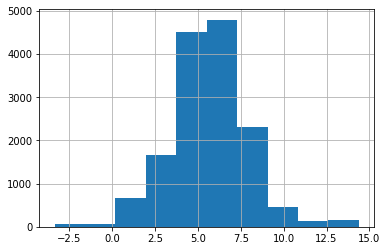

In [17]:
#max pop_density
print(dataFrame.pop_density.max())
#dataFrame.pop_density.hist(bins=[0, 10, 20, 40, 80, 160, 320, 640, 1280, 2560])
#dataFrame.pop_density.hist(bins=[0, 10, 20, 40, 80, 160, 320, 640, 1280])
np.log2(dataFrame.pop_density).hist()
print(np.log2(dataFrame.pop_density).max())

### Info. pop

3893.0
7594270356.0


<AxesSubplot:>

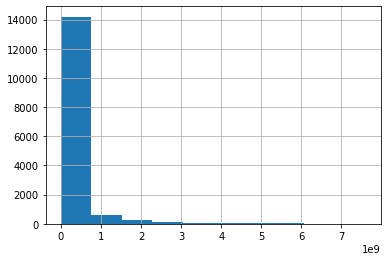

In [20]:
print(dataFrame.population.min())
print(dataFrame.population.max())
dataFrame.population.hist()

### Info. net_migration

-23348620.0
23392352.0


<AxesSubplot:>

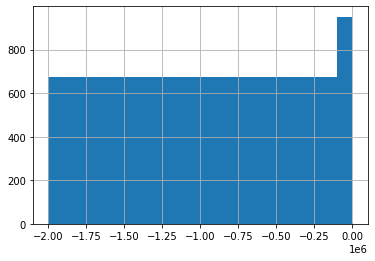

In [25]:
print(dataFrame.net_migration.min())
print(dataFrame.net_migration.max())
dataFrame.net_migration.hist(bins=[-2000000, -100000, 20, 40, 80, 160, 320, 640, 1280])

### Info. migration_perc

-0.2635184148585051
0.7870346311190607


<AxesSubplot:>

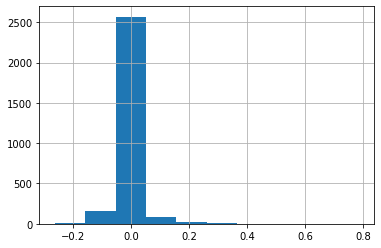

In [22]:
print(dataFrame.migration_perc.min())
print(dataFrame.migration_perc.max())
dataFrame.migration_perc.hist()

### Info. incomeLevel

['Aggregates' nan 'Low income' 'Upper middle income' 'High income'
 'Lower middle income']


<AxesSubplot:>

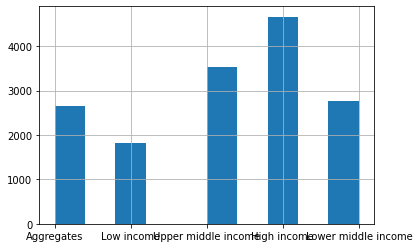

In [23]:
print(pd.unique(dataFrame.incomeLevel))
dataFrame.incomeLevel.hist()

### info region

['Aggregates' nan 'South Asia' 'Europe & Central Asia'
 'Middle East & North Africa' 'East Asia & Pacific' 'Sub-Saharan Africa '
 'Latin America & Caribbean ' 'North America']


<AxesSubplot:>

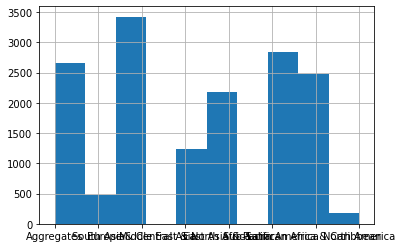

In [24]:
print(pd.unique(dataFrame.region))
dataFrame.region.hist()

### Export as JSON [year][country (code iso2c)][rest of the data]

In [ ]:
jSstr = "{"
for i in dataFrame.year.unique():
    dataFrame_by_year = (dataFrame.loc[dataFrame['year'] == i]).drop(['year'], axis=1)[46:].set_index('iso2c')
    jSstr += "\"" + str(i) + "\":" + dataFrame_by_year.to_json(orient="index") + ","
jSstr = jSstr "}"
with open("Output.json", "w") as text_file:
    text_file.write(jSstr)   

### Export as CSV

In [40]:
dfCsvExp = (dataFrame.loc[dataFrame['year'] == 2017]).drop(['year'], axis=1)[46:]
dfCsvExp.to_csv("datacsv.csv")

### Exort as JSon full

In [41]:
dfJSONExp = (dataFrame.loc[dataFrame['year'] == 2017]).drop(['year'], axis=1)[46:]
jSstr = dfJSONExp.to_json(orient="index")
with open("OutputFull.json", "w") as text_file:
    text_file.write(jSstr)   